<a href="https://colab.research.google.com/github/Pravallika-Myneni/WDL-stage-3/blob/version-2/Stage3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express
#install shapely for geometric objects
!pip install Shapely

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 34 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 1s (1,531 kB/s)
Selecting previously unselected

In [2]:
#Importing Modules and packages required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import folium
import plotly_express as px

In [3]:
!git clone --recursive https://github.com/loreabad6/bna-presentation.git

Cloning into 'bna-presentation'...
remote: Enumerating objects: 129, done.
remote: Total 129 (delta 0), reused 0 (delta 0), pack-reused 129
Receiving objects: 100% (129/129), 98.63 MiB | 24.24 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [4]:
!ls bna-presentation

bna-presentation_cache	bna-presentation.Rmd	figs	  map.html
bna-presentation_files	bna-presentation.Rproj	libs	  README.md
bna-presentation.html	data			macro.js


In [5]:
stressnetwork=gpd.read_file('/content/bna-presentation/data/stress_network_lisbon.geojson')
stressnetwork.head(4)

,gid,osm_id,length,length_m,oneway,maxspeed_f,maxspeed_b,priority,highway,length_2,DN,meanDN,minDN,maxDN,count,stress,tag_id_12,lx_mun_net,class,tunnel,junction,surface,access,foot,lanes,name,cycleway,bicycle,segregated,parking_la,width,turn_lanes,bridge,service,lanes_forw,lanes_back,turn_lan_1,parking__1,parking__2,turn_lan_2,cycleway_b,railway,parking,cycleway_r,crossing,motorcar,oneway_bic,button_ope,geometry
0,5,93795598,0.000233,20.295232,YES,50.0,50.0,2.0,service,396.36016,3,3.0,3.0,4.0,2.0,high,508,NO,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"LINESTRING (-9.13612 38.74149, -9.13589 38.74147)"
1,6,96997235,0.000122,13.508154,YES,50.0,50.0,2.2,residential,13.51100,3,3.0,3.0,3.0,1.0,high,509,NO,1,yes,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"LINESTRING (-9.13555 38.74137, -9.13556 38.74125)"
2,8,37766676,0.000108,9.526669,YES,50.0,50.0,2.5,secondary,150.63655,2,2.0,2.0,2.0,1.0,high,601,NO,1,None,roundabout,asphalt,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"LINESTRING (-9.09795 38.76709, -9.09805 38.76706)"
3,9,49292231,0.000167,15.335548,YES,50.0,50.0,2.0,service,164.83116,6,7.0,6.0,9.0,2.0,high,508,NO,1,None,None,asphalt,yes,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"LINESTRING (-9.10640 38.76440, -9.10655 38.76447)"


In [6]:
stressnetwork.sample(5)

,gid,osm_id,length,length_m,oneway,maxspeed_f,maxspeed_b,priority,highway,length_2,DN,meanDN,minDN,maxDN,count,stress,tag_id_12,lx_mun_net,class,tunnel,junction,surface,access,foot,lanes,name,cycleway,bicycle,segregated,parking_la,width,turn_lanes,bridge,service,lanes_forw,lanes_back,turn_lan_1,parking__1,parking__2,turn_lan_2,cycleway_b,railway,parking,cycleway_r,crossing,motorcar,oneway_bic,button_ope,geometry
14625,22291,182944372,0.002028,176.291632,YES,50.0,50.0,3.0,secondary,176.29649,10,8.0,6.0,10.0,4.0,high,515,NO,1,None,None,None,None,None,2,Rua Professor Pulido Valente,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"LINESTRING (-9.17080 38.76323, -9.17047 38.763..."
34345,51937,527406027,0.000814,75.785509,UNKNOWN,50.0,50.0,1.1,path,75.78124,16,18.0,16.0,20.0,2.0,high,502,NO,1,None,None,paved,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"LINESTRING (-9.16414 38.77830, -9.16392 38.778..."
11360,17414,97717687,0.001627,150.488357,UNKNOWN,50.0,50.0,2.2,residential,243.72915,6,9.0,6.0,14.0,5.0,high,509,NO,1,None,None,None,None,None,None,Rua das Amoreiras,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"LINESTRING (-9.15782 38.72258, -9.15927 38.72332)"
38172,57539,528948289,0.000007,0.742465,UNKNOWN,50.0,50.0,1.1,footway,5.15185,9,9.0,9.0,9.0,1.0,high,504,NO,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,uncontrolled,None,None,"LINESTRING (-9.18453 38.70420, -9.18453 38.704..."
16311,24879,158708361,0.000093,10.115214,UNKNOWN,50.0,50.0,1.1,footway,63.67017,5,5.0,5.0,5.0,1.0,high,504,YES,1,None,None,None,None,None,None,None,None,yes,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"LINESTRING (-9.15762 38.73690, -9.15759 38.73699)"


In [7]:
stressnetwork.columns

Index(['gid', 'osm_id', 'length', 'length_m', 'oneway', 'maxspeed_f',
       'maxspeed_b', 'priority', 'highway', 'length_2', 'DN', 'meanDN',
       'minDN', 'maxDN', 'count', 'stress', 'tag_id_12', 'lx_mun_net', 'class',
       'tunnel', 'junction', 'surface', 'access', 'foot', 'lanes', 'name',
       'cycleway', 'bicycle', 'segregated', 'parking_la', 'width',
       'turn_lanes', 'bridge', 'service', 'lanes_forw', 'lanes_back',
       'turn_lan_1', 'parking__1', 'parking__2', 'turn_lan_2', 'cycleway_b',
       'railway', 'parking', 'cycleway_r', 'crossing', 'motorcar',
       'oneway_bic', 'button_ope', 'geometry'],
      dtype='object')

In [8]:
stressnetwork.shape

(42294, 49)

In [9]:
stressnetwork.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 42294 entries, 0 to 42293
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   gid         42294 non-null  object  
 1   osm_id      42294 non-null  object  
 2   length      42294 non-null  float64 
 3   length_m    42294 non-null  float64 
 4   oneway      42294 non-null  object  
 5   maxspeed_f  42294 non-null  float64 
 6   maxspeed_b  42294 non-null  float64 
 7   priority    42294 non-null  float64 
 8   highway     40392 non-null  object  
 9   length_2    42294 non-null  float64 
 10  DN          42294 non-null  int64   
 11  meanDN      42294 non-null  float64 
 12  minDN       42294 non-null  float64 
 13  maxDN       42294 non-null  float64 
 14  count       42294 non-null  float64 
 15  stress      42294 non-null  object  
 16  tag_id_12   42294 non-null  int64   
 17  lx_mun_net  42294 non-null  object  
 18  class       42294 non-null  int64   
 

In [10]:
print(set(stressnetwork['bicycle']))
print(set(stressnetwork['cycleway_b']))
print(set(stressnetwork['cycleway_r']))
print(set(stressnetwork['lanes']))
print(set(stressnetwork['lanes_back']))
print(set(stressnetwork['lanes_forw']))
print(set(stressnetwork['cycleway']))
print(set(stressnetwork['oneway']))

{'dismount', 'permissive', 'use_sidepath', 'no', 'yes', 'designated', None, 'destination'}
{'through|through', 'left|through|through;right', 'through;left|through|through', 'through|none', 'through|through|through;right', 'left|right', 'left|left|through|through', 'through;left|through|through;right', 'through|through;right', 'left|through|through', 'through;left|through', 'through', 'left;right', 'through|right', 'none|merge_to_left', 'left', 'left|left|through', 'merge_to_right|none', 'left|through', 'left|through;right', None, 'through|through|right', 'none|left|through', 'left|through|right', 'left|through|none'}
{None, 'surface'}
{'3', None, '5', '4', '7', '6', '1', '2'}
{'3', None, '4', '1', '2'}
{'3', None, '4', '1', '2'}
{'shared_lane', 'separate', 'track', 'yes', None, 'lane'}
{'YES', 'NO', 'UNKNOWN', 'REVERSED'}


In [11]:
print(set(stressnetwork['stress']))

{'low', 'high'}


<Figure size 1080x1080 with 0 Axes>

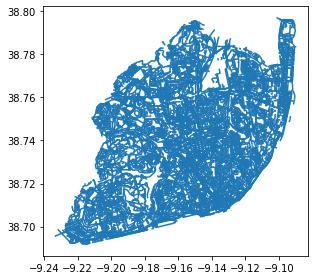

In [12]:
# Plot overlayed maps
plt.figure(figsize= (15,15))
stressnetwork.plot(markersize=0.5)
plt.tight_layout()
#plt.savefig('overlay_map.png')
plt.show()

<Figure size 1080x1080 with 0 Axes>

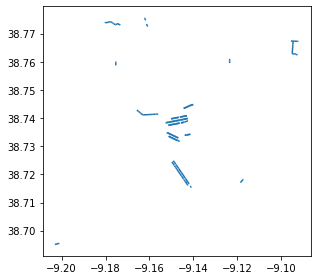

In [13]:
# Plot overlayed maps
plt.figure(figsize= (15,15))
stressnetwork[stressnetwork['cycleway'].notnull()].plot(markersize=0.5)
plt.tight_layout()
#plt.savefig('overlay_map.png')
plt.show()

<Figure size 1080x1080 with 0 Axes>

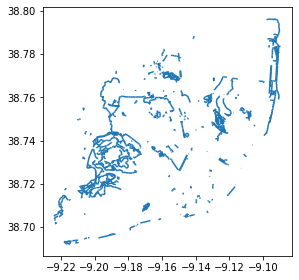

In [14]:
# Plot overlayed maps
plt.figure(figsize= (15,15))
stressnetwork[stressnetwork['bicycle'].notnull()].plot(markersize=0.5)
plt.tight_layout()
#plt.savefig('overlay_map.png')
plt.show()

In [15]:
cycleways=gpd.read_file('/content/bna-presentation/data/cycleways_2018_lisbon.geojson')
cycleways.head(4)

,OBJECTID,COD_SIG_TR,COD_VIA,DESIGNACAO,HIERARQUIA,EIXO,TIPOLOGIA,SITUACAO,DUPL_TROC,TIPO_OBRA,ZONA,COMPRIMENTO,IDTIPO,GlobalID,Shape__Length,geometry
0,1,23754,35282,Alameda dos Oceanos,Principal,Marginal,Pista Ciclavel Unidirecional,Existente,N,None,ZON,117.11,9196,a7f4d1e3-fac3-441e-b8c4-d50e431b47cf,0.001056,"MULTILINESTRING ((-9.09533 38.77476, -9.09534 ..."
1,2,158239,35282,Alameda dos Oceanos,Principal,Marginal,Pista Ciclavel Unidirecional,Existente,N,None,ZON,16.51,9196,e0e435f2-9cba-4e90-85f3-6fcee2645798,0.000149,"MULTILINESTRING ((-9.09542 38.77371, -9.09544 ..."
2,3,23753,35282,Alameda dos Oceanos,Principal,Marginal,Pista Ciclavel Unidirecional,Existente,N,None,ZON,84.30,9196,25d9d21e-43e3-4126-8a30-e59e71c33baa,0.000760,"MULTILINESTRING ((-9.09544 38.77356, -9.09545 ..."
3,4,157672,35282,Alameda dos Oceanos,Principal,Marginal,Pista Ciclavel Unidirecional,Existente,N,None,ZON,56.87,9196,22a0b091-d1cd-4c59-9219-1c55b4dc00f3,0.000513,"MULTILINESTRING ((-9.09549 38.77281, -9.09550 ..."


In [16]:
cycleways.shape

(622, 16)

In [17]:
cycleways.info()
#TIPO_OBRA is having 87 null values
#EIXO is having 2 null values
#ZONA is having 237 null values
#DUPL_TRCO is having 1 null values

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       622 non-null    int64   
 1   COD_SIG_TR     622 non-null    object  
 2   COD_VIA        622 non-null    object  
 3   DESIGNACAO     622 non-null    object  
 4   HIERARQUIA     622 non-null    object  
 5   EIXO           620 non-null    object  
 6   TIPOLOGIA      622 non-null    object  
 7   SITUACAO       622 non-null    object  
 8   DUPL_TROC      621 non-null    object  
 9   TIPO_OBRA      535 non-null    object  
 10  ZONA           385 non-null    object  
 11  COMPRIMENTO    622 non-null    float64 
 12  IDTIPO         622 non-null    object  
 13  GlobalID       622 non-null    object  
 14  Shape__Length  622 non-null    float64 
 15  geometry       622 non-null    geometry
dtypes: float64(2), geometry(1), int64(1), object(12)
memory usage: 77.9+ KB


In [18]:
#Exploring nulll values to analyse how to fill those missing values if required
print("List of unique values in TIPO_OBRA : {0}".format(set(cycleways['TIPO_OBRA'])))
print("List of unique values in EIXO : {0}".format(set(cycleways['EIXO'])))
print("List of unique values in DUPL_TROC : {0}".format(set(cycleways['DUPL_TROC'])))
print("List of unique values in ZONA : {0}".format(set(cycleways['ZONA'])))

List of unique values in TIPO_OBRA : {' ', 'A Definir', 'Alteração de Geometria', 'Recarga', 'Pintura', 'Manutenção', None}
List of unique values in EIXO : {'Circular Exterior', ' ', 'Alcântara - Luz', 'Benfica - Braço de Prata', 'Marginal', 'Olivais - Beato', None, 'Central'}
List of unique values in DUPL_TROC : {' ', None, 'S', 'N'}
List of unique values in ZONA : {'ZON', 'Parque das Nações', 'ZOC', 'Planalto', None}


In [19]:
print("List of unique values in TIPO_LOGIA : {0}".format(set(cycleways['TIPOLOGIA'])))

List of unique values in TIPO_LOGIA : {'Trilho', 'Bus+Bici', 'Faixa Ciclavel (Contraflow)', 'Faixa Ciclavel', 'Pista Ciclavel Unidirecional', 'Zona de Coexistência', '30+Bici', 'Pista Ciclavel Bidirecional'}


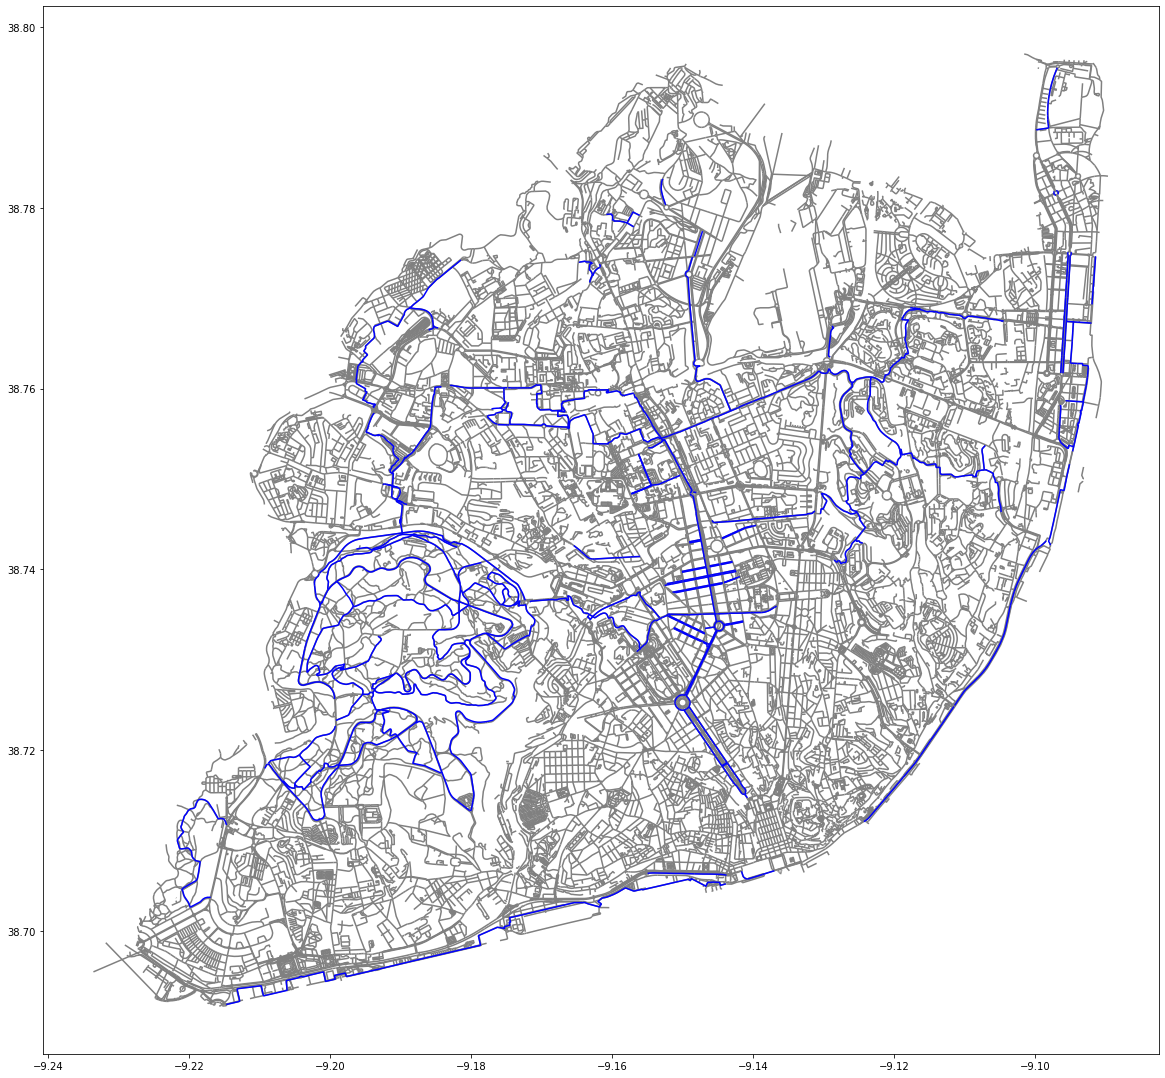

In [31]:
ax= stressnetwork.plot(color = "grey", figsize=(20,20))
cycleways.plot(color = "blue", ax =ax)

In [33]:
set(stressnetwork['stress'])

{'high', 'low'}

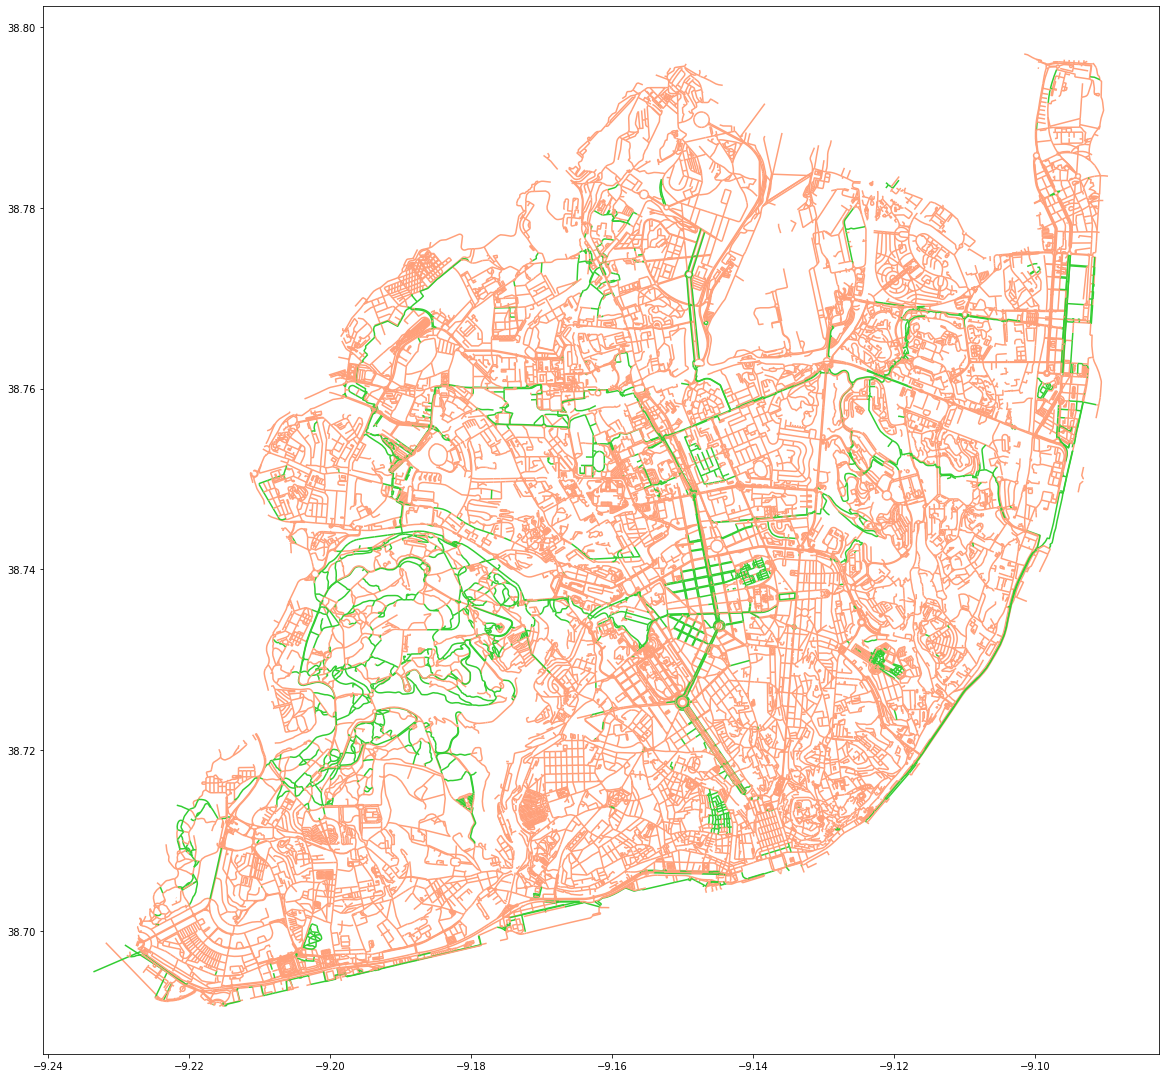

In [36]:
colour_mapping = {'high': "lightsalmon", 'low' : "limegreen"}
ax= stressnetwork.plot(color = stressnetwork['stress'].map(colour_mapping), figsize=(20,20))

In [37]:
services_lisbon = gpd.read_file("/content/bna-presentation/data/services_lisbon.geojson")
services_lisbon.head()

,osm_id,service_type,name,id,geometry
0,-7781867.0,park,Parque de cães,1,POINT (-93266.665 -101036.344)
1,-7117482.0,park,Parque da Bela Vista,2,POINT (-86666.662 -101151.814)
2,-7117482.0,park,Parque da Bela Vista,3,POINT (-86666.662 -100920.874)
3,-7117482.0,park,Parque da Bela Vista,4,POINT (-86466.662 -101729.165)
4,-7117482.0,park,Parque da Bela Vista,5,POINT (-86466.662 -101498.225)


In [38]:
services_lisbon.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1939 entries, 0 to 1938
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   osm_id        1939 non-null   float64 
 1   service_type  1939 non-null   object  
 2   name          1515 non-null   object  
 3   id            1939 non-null   int64   
 4   geometry      1939 non-null   geometry
dtypes: float64(1), geometry(1), int64(1), object(2)
memory usage: 75.9+ KB


In [40]:
print(len(set(services_lisbon['id'])))
print(len(set(services_lisbon['osm_id'])))
print(len(set(services_lisbon['name'])))
print(len(set(services_lisbon['service_type'])))

1939
1169
813
12


In [42]:
set(services_lisbon['service_type'])

{'college',
 'dentist',
 'doctors',
 'hospital',
 'library',
 'nature_reserve',
 'park',
 'pharmacy',
 'school',
 'social_facility',
 'supermarket',
 'university'}

ValueError: ignored

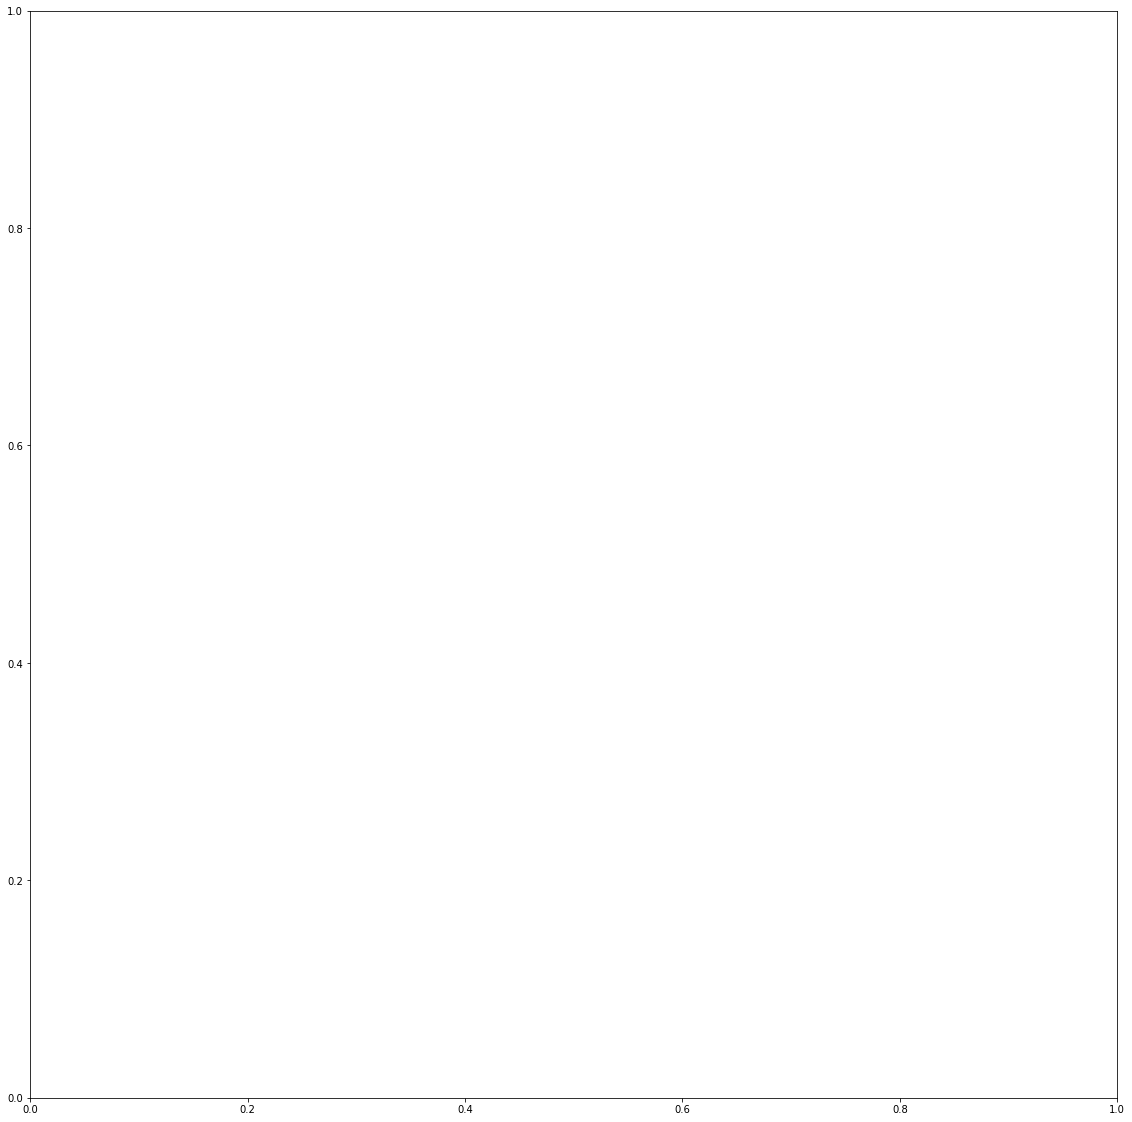

In [60]:
colour_mapping_services_by_type = {'college': 'green',
 'dentist': "orange",
 'doctors': "pink",
 'hospital': "red",
 'library': "yellow",
 'nature_reserve': "blue",
 'park' : "lightblue" ,
 'pharmacy': "lightred",
 'school': "magneta",
 'social_facility' : "darkgreen",
 'supermarket' : "black",
 'university': "lightgreen"}
ax= services_lisbon.plot( color = services_lisbon['service_type'].map(colour_mapping_services_by_type), figsize=(20,20))


In [20]:
grid=gpd.read_file('/content/bna-presentation/data/bna_grid_lisbon.geojson')
grid.head()

,id,bna,freguesia,grid_population,freg_population,geometry
0,175,0.000000,Belém,116.394366,16528,"POLYGON ((-95600.000 -107387.200, -95533.333 -..."
1,231,0.000000,Belém,116.394366,16528,"POLYGON ((-95400.000 -107502.670, -95333.333 -..."
2,232,14.242553,Belém,116.394366,16528,"POLYGON ((-95400.000 -107271.730, -95333.333 -..."
3,233,14.241096,Belém,116.394366,16528,"POLYGON ((-95400.000 -107040.790, -95333.333 -..."
4,286,0.000000,Belém,116.394366,16528,"POLYGON ((-95200.000 -107618.140, -95133.333 -..."


In [21]:
grid.describe()

,id,bna,grid_population,freg_population
count,1997.000000,1997.000000,1997.000000,1997.000000
mean,2022.250376,8.048107,276.765148,26567.991487
std,845.114839,17.960270,130.129122,10038.892160
min,175.000000,0.000000,116.394366,11836.000000
25%,1354.000000,0.000000,179.700855,16528.000000
50%,2012.000000,0.000000,266.147887,22480.000000
75%,2677.000000,6.000000,318.916084,33788.000000
max,3693.000000,70.676748,703.400000,45605.000000


In [22]:
set(grid['freguesia']) ## Parish

{'Ajuda',
 'Alcântara',
 'Alvalade',
 'Areeiro',
 'Arroios',
 'Avenidas Novas',
 'Beato',
 'Belém',
 'Benfica',
 'Campo de Ourique',
 'Campolide',
 'Carnide',
 'Estrela',
 'Lumiar',
 'Marvila',
 'Misericórdia',
 'Olivais',
 'Parque das Nações ',
 'Penha de França',
 'Santa Clara',
 'Santa Maria Maior',
 'Santo António',
 'São Domingos de Benfica',
 'São Vicente'}

<Figure size 1080x1080 with 0 Axes>

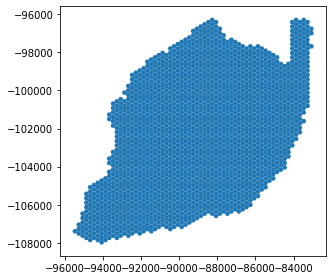

In [24]:
# Plot overlayed maps
plt.figure(figsize= (15,15))
grid.plot(markersize=0.5)
plt.tight_layout()
#plt.savefig('overlay_map.png')
plt.show()

##Grouping the data by Parish ('freguesia')

Index(['geometry', 'id', 'bna', 'grid_population', 'freg_population'], dtype='object')


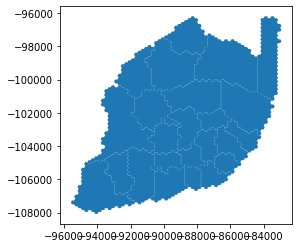

In [23]:
#grid_by_parish = grid.groupby(by = 'freguesia').agg({'bna': 'mean'})
grid_by_parish = grid.dissolve(by='freguesia', aggfunc ="mean")
print(grid_by_parish.columns)
grid_by_parish.plot()